In [1]:
# PACKAGE LOADING
import pandas as pd
import os
import numpy as np
import pandas as pd
import collections
import scipy.stats as st
import seaborn as sns
import collections
import matplotlib.pyplot as plt

#DISPLAY ALL THE COLUMNS IN CASE 
pd.set_option('display.max_columns', None)

#SET THE PATH TO LOCAL
os.chdir('/Users/changxuezhi/Desktop/566/')

In [2]:
fill  = pd.read_csv('metrics_BACK_YongXieStrategyForSPY_2020-11-30_023409_start_10-30-2019_end_10-30-2019_fill.csv')
order= pd.read_csv('metrics_BACK_YongXieStrategyForSPY_2020-11-30_023409_start_10-30-2019_end_10-30-2019_order.csv')
pnl= pd.read_csv('metrics_BACK_YongXieStrategyForSPY_2020-11-30_023409_start_10-30-2019_end_10-30-2019_pnl.csv')

In [3]:
#the profit and loss is depends on how much you buy and how much you invest
#since in 10 30 their is 5204 filled traded.
#we can plot the cumulative return by

total_invest=[]
total_cost=[]
for i in range(len(pnl)):
    total_invest.append(sum(fill[fill['TradeTime']<=pnl['Time'].loc[i]].Price))
    total_cost.append(sum(fill[fill['TradeTime']<=pnl['Time'].loc[i]].ExecutionCost))
pnl['total_invest']=total_invest
pnl['total_cost']=total_cost
pnl['cumu_return_percentage']=pnl['Cumulative PnL']/pnl['total_invest']


In [4]:
pnl['simplereturn']=0
for i in range(len(pnl)):
    if i==0:
        pnl['simplereturn'].loc[i]=pnl['cumu_return_percentage'].loc[i]
    else:
        pnl['simplereturn'].loc[i]=(1+pnl['cumu_return_percentage'].loc[i])/(1+pnl['cumu_return_percentage'].loc[i-1])-1

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


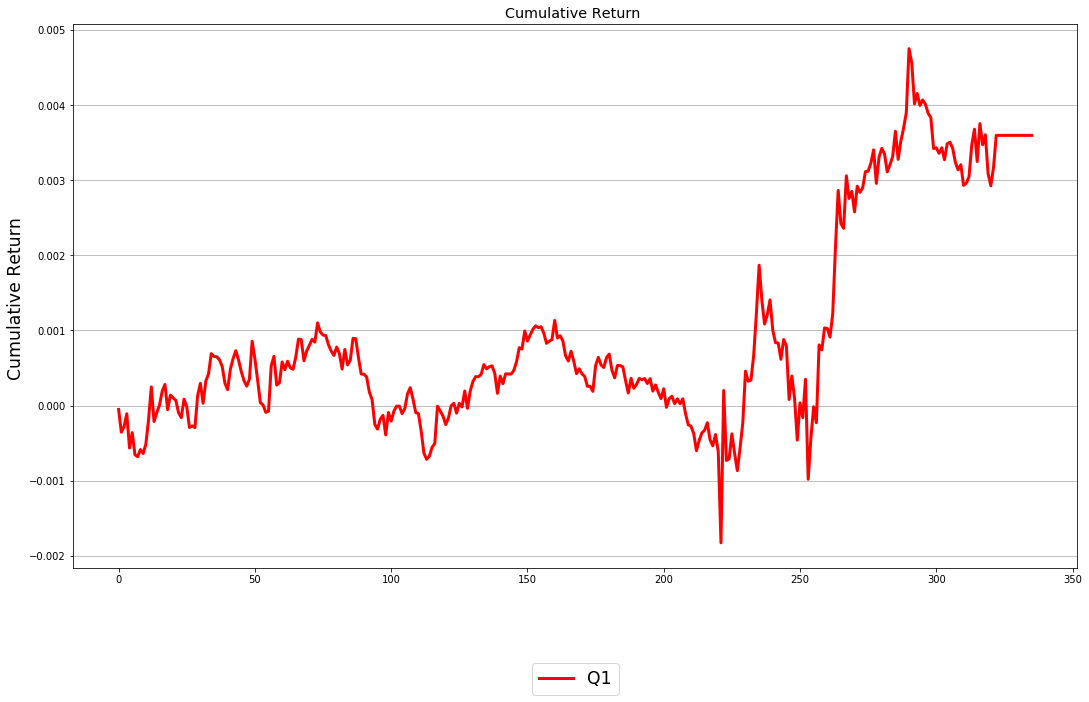

In [5]:


plt.figure(figsize=(18,10))
plt.ylabel('Cumulative Return ',fontsize="xx-large")
plt.title('Cumulative Return ',fontsize="x-large")
plt.gca().yaxis.grid(True)
plt.plot(pnl['cumu_return_percentage'],color='red',label="Q1",lw=3)
plt.legend(fontsize="xx-large",loc='lower center',bbox_to_anchor=(0.5, -0.25), ncol=3)



In [6]:
year=1/252

cumure=pnl[-1:]
cr=cumure[[ 'cumu_return_percentage']]#'Cumulative_return_CompQ5-Q1']]#'Cumulative_return_CompSP500']]
cr['Annualized']=(cr['cumu_return_percentage']+1)**(1/year)-1#this is only calculated using 1 days return, has large bias
cr['vol']=np.sqrt(pnl['simplereturn'].var()*252*330)#yearly

cr['Sharpe']=cr['Annualized']/cr['vol']
pnl['downside_returns'] = 0

rfr = 0
target = 0
pnl.loc[pnl['simplereturn'] < target, 'downside_returns'] = pnl['simplereturn']**2

down_stdev = np.sqrt(pnl['downside_returns'].mean()*330*252)
cr['Sortino']=cr['Annualized']/down_stdev

cr['T-Stat']=st.ttest_1samp(pnl['simplereturn'],0).statistic
cr['P-Value']= st.ttest_1samp(pnl['simplereturn'],0).pvalue
cr       

/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/changxuezhi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,cumu_return_percentage,Annualized,vol,Sharpe,Sortino,T-Stat,P-Value
335,0.003599,1.47256,0.081213,18.132138,28.222883,0.698455,0.485377
